Mounted at /content/drive
✅ STEP 1: Processing 102 files...
✅ STEP 2: Training Predictive Model...

TECHNICAL PERFORMANCE - ACCURACY: 0.5173


/tmp/ipython-input-4171333988.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, y='operation', palette='viridis')


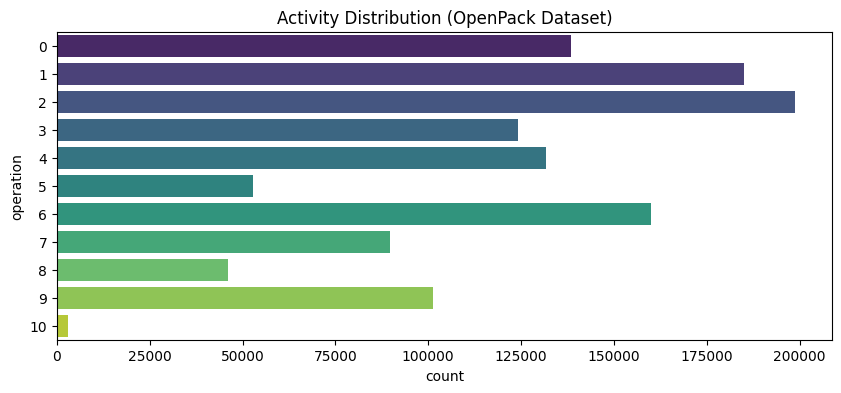

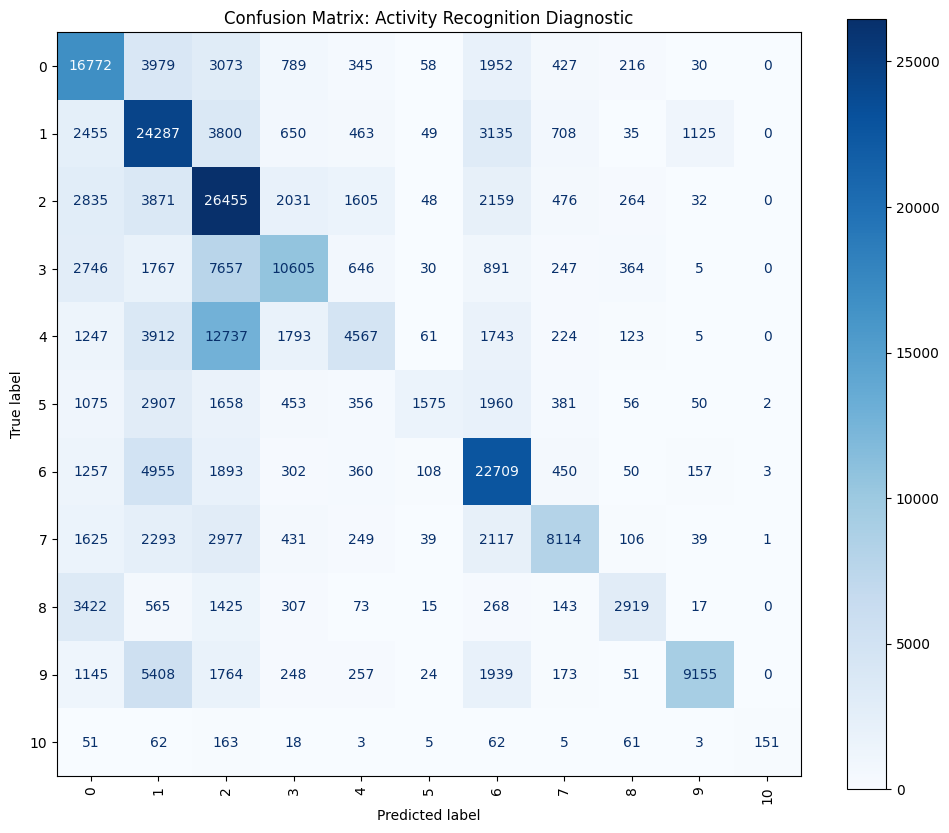

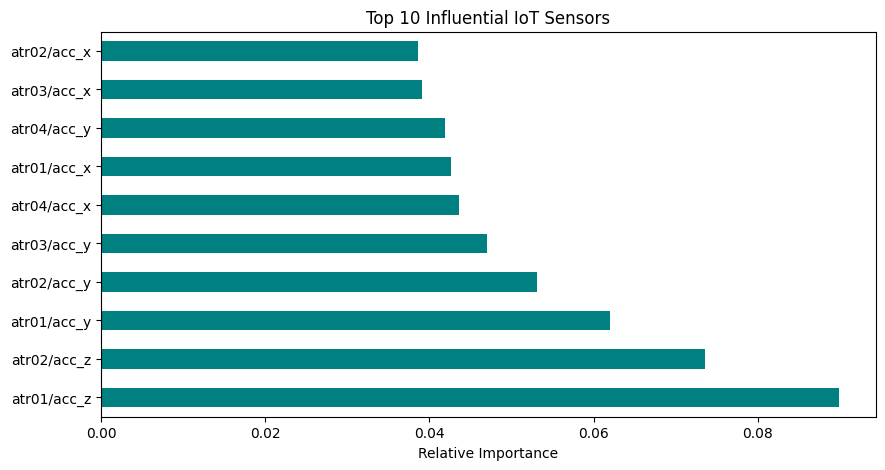


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.61      0.54     27641
           1       0.45      0.66      0.54     36707
           2       0.42      0.67      0.51     39776
           3       0.60      0.42      0.50     24958
           4       0.51      0.17      0.26     26412
           5       0.78      0.15      0.25     10473
           6       0.58      0.70      0.64     32244
           7       0.72      0.45      0.55     17991
           8       0.69      0.32      0.44      9154
           9       0.86      0.45      0.59     20164
          10       0.96      0.26      0.41       584

    accuracy                           0.52    246104
   macro avg       0.64      0.44      0.47    246104
weighted avg       0.57      0.52      0.50    246104



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Process completed successfully for Phase 4.


In [2]:


# =============================================================================
# PROJECT: OPENPACK PHASE 4 - INDUSTRIAL IOT ACTIVITY RECOGNITION
# COURSE: DATA ANALYTICS (203018207)
# GROUP 2: CARLOS ANDRES GUTIERREZ & LUCERO CHAMORRO SERNA
#
# JUSTIFICATION:
# This algorithm addresses the lack of real-time traceability and the
# frequency of human errors in manual industrial packaging processes.
# By leveraging the OpenPack dataset, we implement an IoT-based analytical
# solution to automate activity recognition using multimodal sensor data (IMU).
#
# MAIN DATASET REFERENCE:
# - Kitamura, S., Hashimoto, A., Sakamoto, H., Nakamura, T., & Kawanaka, M. (2022).
#   OpenPack: A Large-Scale Dataset for Recognizing Packaging Works in
#   IoT-Enabled Logistic Environments. arXiv preprint arXiv:2212.11152.
#   URL: https://arxiv.org/html/2212.11152v2
#
# METHODOLOGICAL REFERENCES :
# - Greeneltch, N. (2019). Python Data Mining Quick Start Guide. Packt Publishing.
# - Swamynathan, M. (2019). Mastering Machine Learning with Python in Six Steps. Apress.
# - Raghavender, U. S. (2019). Data Reduction and Analysis. Arcler Press.
# - Hearty, J. (2016). Advanced Machine Learning with Python. Packt Publishing.
# =============================================================================

import pandas as pd
import numpy as np
import glob
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive, files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. DATA ACQUISITION & OPTIMIZATION (Ref: Raghavender, 2019)
# Articulation: Loading 102 industrial sessions from OpenPack (Kitamura et al., 2022)
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/OpenPack'
all_files = glob.glob(os.path.join(path, "*.csv"))

if len(all_files) == 0:
    print("❌ ERROR: No CSV files found in Drive path.")
else:
    print(f"✅ STEP 1: Processing {len(all_files)} files...")
    list_df = []
    for f in all_files:
        temp = pd.read_csv(f)
        # Applying Data Reduction to optimize RAM (Raghavender, 2019)
        temp = temp.iloc[::5, :]
        list_df.append(temp)

    # Data Cleaning and Preprocessing (Ref: Greeneltch, 2019)
    df_clean = pd.concat(list_df, ignore_index=True).replace([np.inf, -np.inf], np.nan).dropna()
    del list_df # Memory management

    # 2. FEATURE SELECTION & SCALING
    # Selecting relevant IMU sensors for predictive modeling
    excluded = ['time', 'operation', 'source', 'user', 'session', 'label', 'id', 'source_file']
    sensor_cols = [c for c in df_clean.select_dtypes(include=[np.number]).columns
                   if not any(x in c.lower() for x in excluded)]

    X = df_clean[sensor_cols]
    y = df_clean['operation']

    # Standardizing IoT signals (Ref: Swamynathan, 2019)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # 3. ALGORITHM CONSTRUCTION (Ref: Hearty, 2016)
    # Implementing Random Forest for complex activity recognition
    print(f"✅ STEP 2: Training Predictive Model...")
    model = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    # 4. POST-PROCESSING & VISUAL DIAGNOSTICS
    y_pred = model.predict(X_test)

    print("\n" + "="*50)
    print(f"TECHNICAL PERFORMANCE - ACCURACY: {accuracy_score(y_test, y_pred):.4f}")
    print("="*50)

    # --- PLOT 1: Descriptive Analysis ---
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df_clean, y='operation', palette='viridis')
    plt.title('Activity Distribution (OpenPack Dataset)')
    plt.show()

    # --- PLOT 2: Predictive Performance (Confusion Matrix) ---
    fig, ax = plt.subplots(figsize=(12, 10))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap='Blues', xticks_rotation='vertical')
    plt.title('Confusion Matrix: Activity Recognition Diagnostic')
    plt.show()

    print("\n\n")

    # --- PLOT 3: Sensor Influence (Ref: Greeneltch, 2019) ---
    plt.figure(figsize=(10, 5))
    feat_importances = pd.Series(model.feature_importances_, index=sensor_cols)
    feat_importances.nlargest(10).plot(kind='barh', color='teal')
    plt.title('Top 10 Influential IoT Sensors')
    plt.xlabel('Relative Importance')
    plt.show()

    # 5. MODEL PERSISTENCE
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred))

    joblib.dump(model, 'openpack_model_phase4.pkl')
    files.download('openpack_model_phase4.pkl')
    print("✅ Process completed successfully for Phase 4.")